# Clustering Antarctic Penguin Species
## Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [53]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and examine the dataset.
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.head())
penguins_df.info()

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


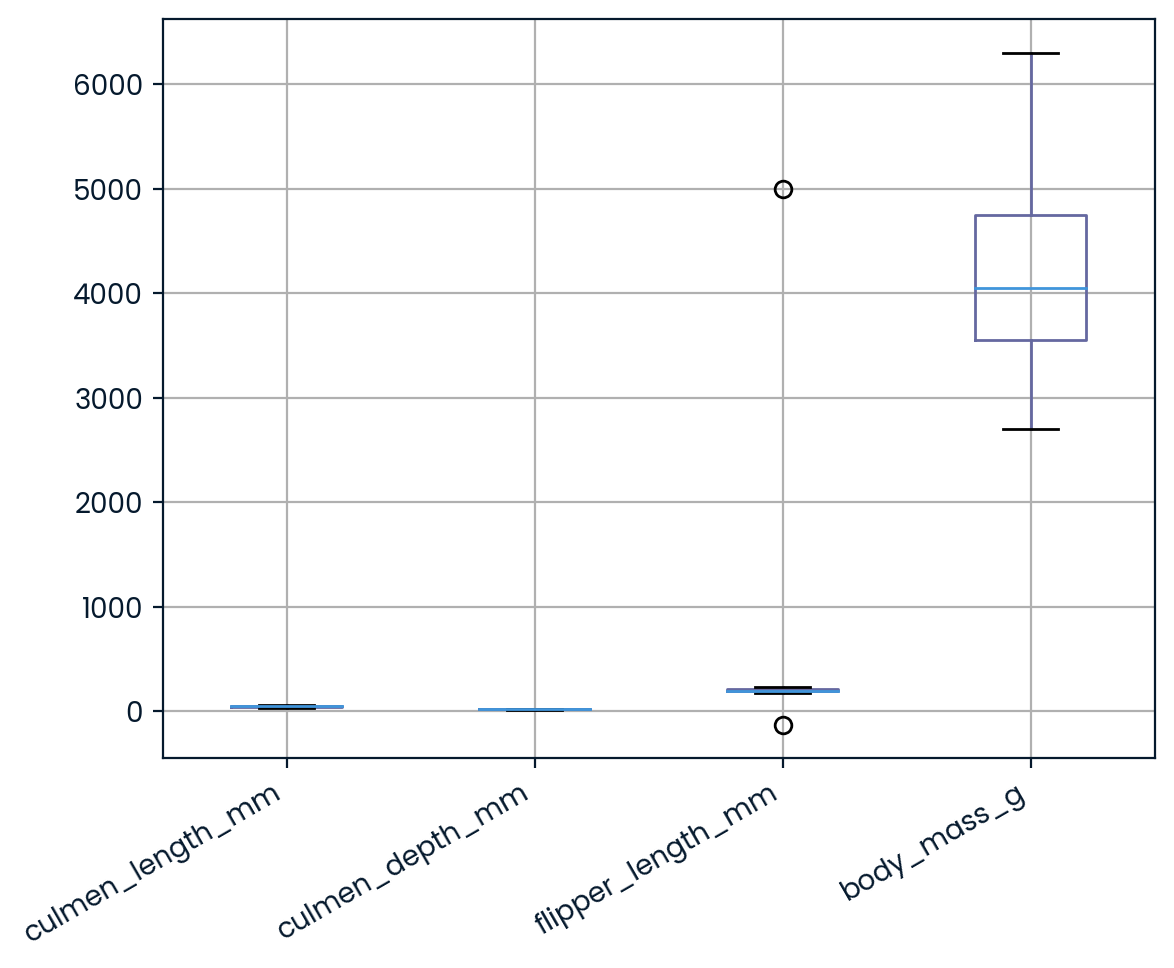

In [54]:
# Clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called penguins_clean.
# Plot the data
ax = penguins_df.boxplot()  
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [55]:
# Remove null values 
penguins_df = penguins_df.dropna()

# Remove outliers using IQR method and save as a cleaned DataFrame called penguins_clean.
quartile1 = penguins_df['flipper_length_mm'].quantile(0.25)
quartile3 = penguins_df['flipper_length_mm'].quantile(0.75)
iqr = quartile3 - quartile1
upper_threshold = quartile3 + 1.5 * iqr
lower_threshold = quartile1 - 1.5 * iqr
penguins_clean = penguins_df[(penguins_df["flipper_length_mm"] < upper_threshold) & (penguins_df["flipper_length_mm"] > lower_threshold)]

# examine new dataframe
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


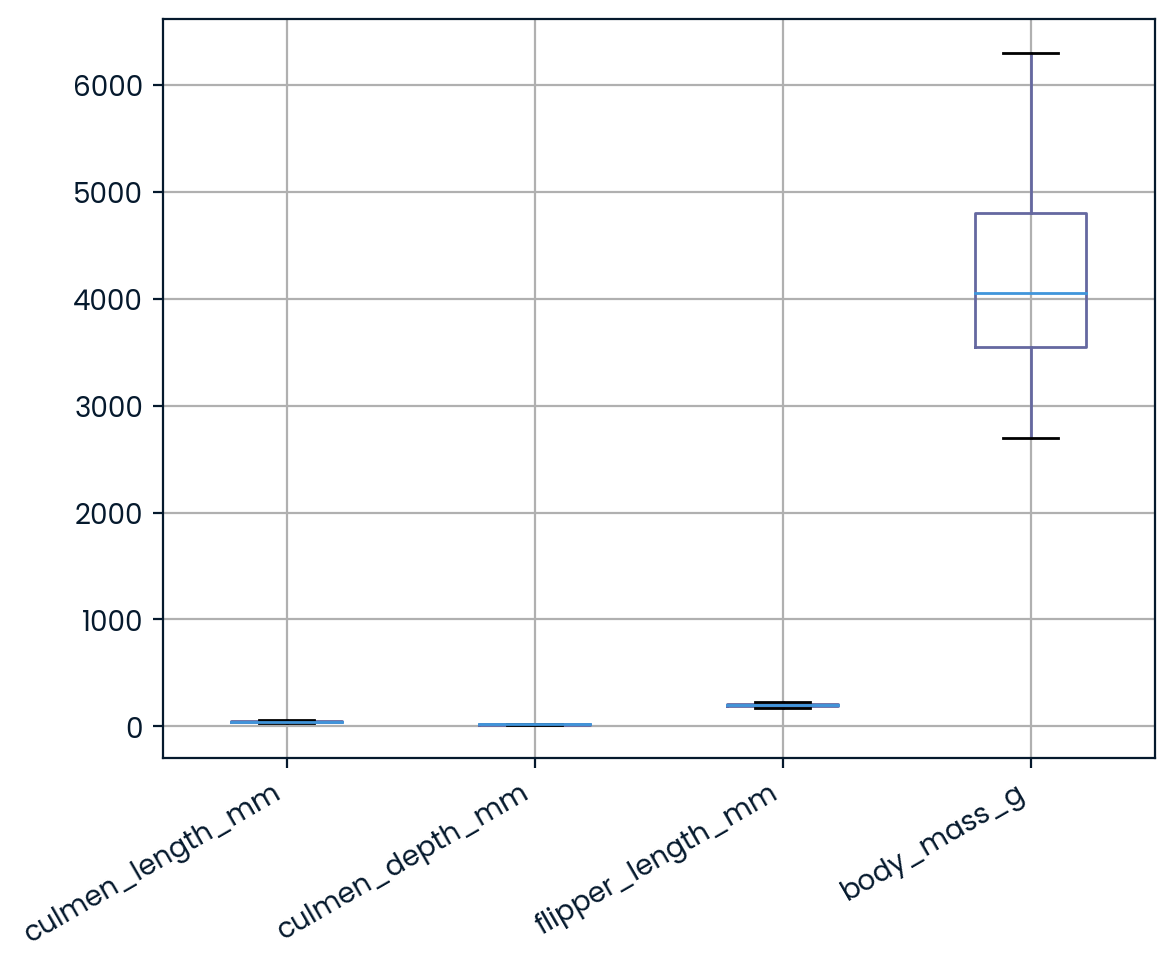

In [56]:
# plot new dataframe
ax = penguins_clean.boxplot()  
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [57]:
# Pre-process the cleaned data:
# Use one-hot encoding to add dummy variables and remove the original categorical feature from the dataset.
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [58]:
# Scale the data using the standard scaling method and save the updated data as a new DataFrame called penguins_preprocessed.
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


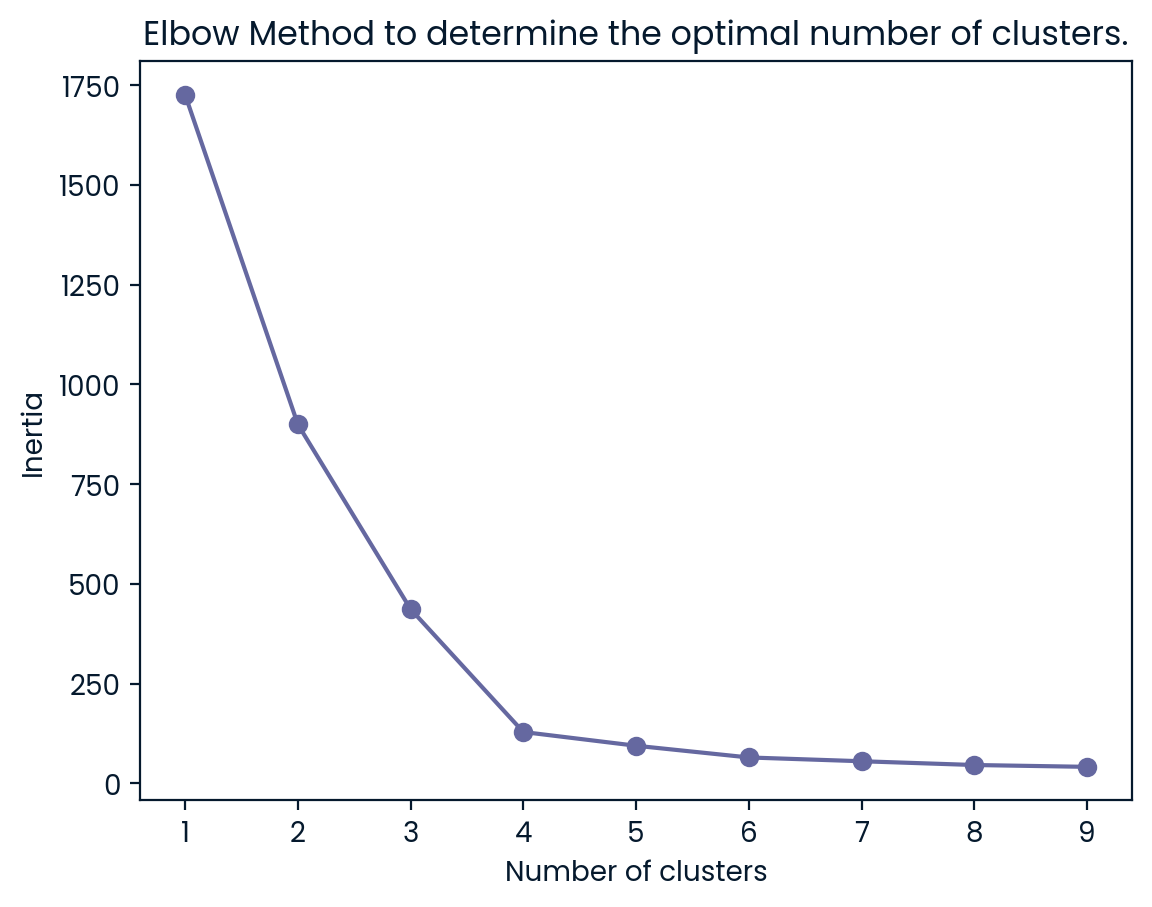

In [59]:
# Perform Principal Component Analysis (PCA) on the penguins_preprocessed dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component, saving the number of components as a variable called n_components.
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
# Execute PCA using n_components and store the result as penguins_PCA.
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Determine the optimal number of clusters through elbow analysis using k-means clustering on the penguins_PCA dataset, setting random_state=42. Save the optimal number of clusters in a variable called n_cluster.
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to determine the optimal number of clusters.')
plt.show()

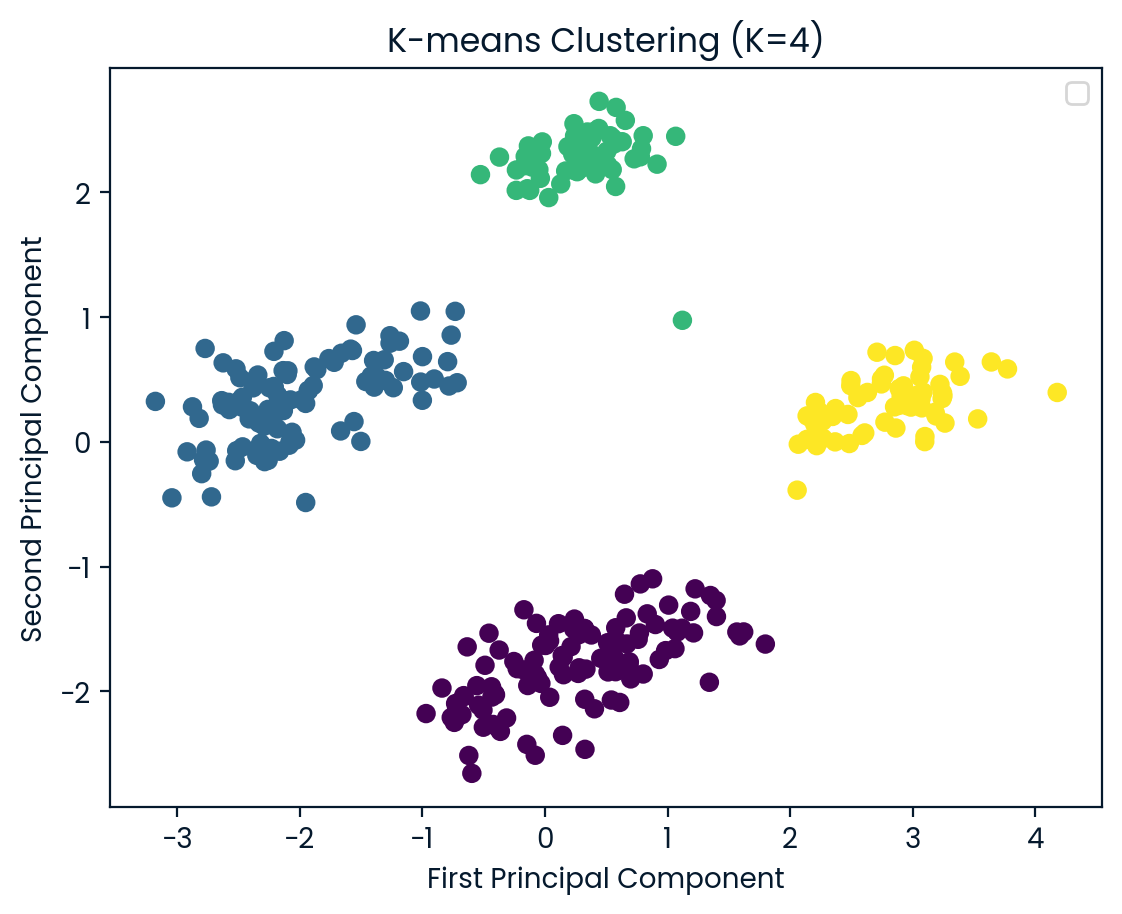

In [60]:
# The plot shows that the optimal number of clusters is 4
n_clusters = 4

# Create and fit a new k-means cluster model, setting n_cluster equal to the n_cluster variable, saving the model as a variable called kmeans.
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_PCA)

# Visualize clusters using the first two principle components.
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [61]:
# Add the label column extracted from the k-means clustering (using kmeans.labels_) to the penguins_clean DataFrame.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

# Create a statistical table by grouping penguins_clean based on the "label" column and calculating the mean of each numeric column. Save this table as stat_penguins.
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
# view the table
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
